# Анализ коментариев на уровне букв.


## Подготовка данных.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
# Загружаем данные (уже разбитые на тренировочные и валидационные), переводим все в numpy array.
val_reviews = pd.read_csv('data/reviews_test.csv')
train_reviews = pd.read_csv('data/reviews_train.csv')

X_val = val_reviews.comment.values
y_val = val_reviews.reting.values

X_train = train_reviews.comment.values
y_train = train_reviews.reting.values


X_train.shape

(12410,)

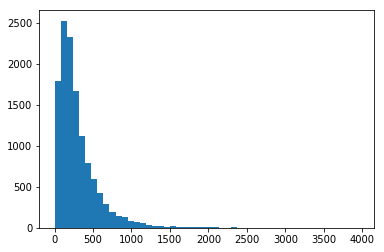

In [3]:
# Визуализируем распределение оп количеству букв в коментариях, в последствии дополняем или урезаем текст до 500 букв.
# Тем самым урезаем количество параметров для некоторых коментариев.
len_X =[]
for i in X_train:
    len_X.append(len(i))
plt.hist(len_X, bins =50)
plt.show()

In [4]:
vocabulary = ['а','б','в','г','д','е','ё','ж','и','й','к','л','м','н','о','п','р','с','т','у','ф','х','ц','ч','ш','щ','ъ','ы','ь','э','ю','я',
              'А','Б','В','Г','Д','Е','Ё','Ж','З','И','Й','К','Л','М','Н','О','П','Р','С','Т','У','Ф','Х','Ц','Ч','Ш','Щ','Ъ','Ы','Ь','Э','Ю','Я',
             '!','@','#','$','%','^','&','*','(',')',':',';','/',',','.','%','№','?','~','-','+','=',' ',
              'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
 

In [5]:
# Методы для перевода в "цифровой" вид - либо в onehot, либо в букву в номер в словаре.
def one_hot (sentence):
    
    vocabulary = ['а','б','в','г','д','е','ё','ж','з','и','й','к','л','м','н','о','п','р','с','т','у','ф','х','ц','ч','ш','щ','ъ','ы','ь','э','ю','я',
              'А','Б','В','Г','Д','Е','Ё','Ж','З','И','Й','К','Л','М','Н','О','П','Р','С','Т','У','Ф','Х','Ц','Ч','Ш','Щ','Ъ','Ы','Ь','Э','Ю','Я',
             '!','@','#','$','%','^','&','*','(',')',':',';','/',',','.','%','№','?','~','-','+','=',' ',
              'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    result = np.zeros((1,len(vocabulary)))
    for char in sentence:
        if char in vocabulary:
            vector = np.zeros((1,len(vocabulary)))
            vector[0, vocabulary.index(char)] = 1
            result = np.concatenate((result, vector)) 
            
    result = np.delete(result, (0), axis=0)
    #encoded = one_hot(sentence)
    if len(result)<500:
        result = np.concatenate((result, np.zeros((500-result.shape[0],result.shape[1]))))
    if len(result)>500:
        result = result[:500,:]
    return result
            
def char_to_vocab (sentence):
    vocabulary = ['а','б','в','г','д','е','ё','ж','з','и','й','к','л','м','н','о','п','р','с','т','у','ф','х','ц','ч','ш','щ','ъ','ы','ь','э','ю','я',
              'А','Б','В','Г','Д','Е','Ё','Ж','З','И','Й','К','Л','М','Н','О','П','Р','С','Т','У','Ф','Х','Ц','Ч','Ш','Щ','Ъ','Ы','Ь','Э','Ю','Я',
             '!','@','#','$','%','^','&','*','(',')',':',';','/',',','.','%','№','?','~','-','+','=',' ',
              'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    result = []
    for char in sentence:
        if char in vocabulary:
            result.append(vocabulary.index(char)+1)
            
    result = np.array(result)
    #encoded = one_hot(sentence)
    if len(result)<500:
        result = np.concatenate((result, np.zeros(500-result.shape[0])))
    if len(result)>500:
        result = result[:500]
    return result
char_to_vocab(X_train[1])
#X_train[0]

array([ 45.,  21.,  17.,  10.,  13.,  89.,  20.,   1.,  12.,  16.,  11.,
        89.,  14.,   1.,  14.,   6.,  81.,  89.,  48.,   6.,  89.,   9.,
        15.,   1.,  32.,  80.,  89.,  25.,  20.,  16.,  89.,  20.,  21.,
        20.,  89.,  17.,  10.,  26.,  21.,  20.,  89.,  16.,  89.,   6.,
         4.,  16.,  89.,  15.,   6.,  15.,   1.,   5.,   7.,   8.,  15.,
        16.,  19.,  20.,  10.,  80.,  89.,  21.,  89.,  15.,   1.,  19.,
        89.,  16.,  15.,  89.,  21.,   8.,   6.,  89.,   2.,  16.,  13.,
        30.,  26.,   6.,  89.,   4.,  16.,   5.,   1.,  89.,  10.,  19.,
        17.,  18.,   1.,   3.,  15.,  16.,  89.,  19.,  13.,  21.,   8.,
        10.,  20.,  81.,  89.,  48.,  10.,  25.,   6.,   4.,  16.,  89.,
        15.,   6.,  89.,  19.,  12.,  18.,  10.,  17.,  10.,  20.,  80.,
        89.,  15.,   6.,  89.,  16.,  20.,   3.,   1.,  13.,  10.,   3.,
         1.,   6.,  20.,  19.,  33.,  81.,  89.,  42.,   3.,   6.,  15.,
        10.,  20.,  89.,   4.,  18.,  16.,  14.,  1

In [6]:
# Переводим все коментарии в цифровой вид
X_train_new = []
for sentence in tqdm(X_train):
    X_train_new.append(char_to_vocab(sentence))
X_train_new = np.array(X_train_new)

X_val_new = []
for sentence in tqdm(X_val):
    X_val_new.append(char_to_vocab(sentence))
X_val_new = np.array(X_val_new)

100%|██████████| 3103/3103 [00:01<00:00, 1885.20it/s]


In [7]:
print(X_train_new.shape, X_val_new.shape)
X_train_new[2]

(12410, 500) (3103, 500)


array([ 38.,   6.,  26.,   6.,   3.,  29.,  11.,  89.,   3.,   6.,  15.,
        20.,  10.,  13.,  33.,  20.,  16.,  18.,  80.,  89.,  23.,  16.,
        18.,  16.,  26.,  16.,  89.,  16.,   2.,   5.,  21.,   3.,   1.,
         6.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
# Сохраняем данные для дальнейшего обучения моделей
np.save('data_wl/X_train_voc.npy',X_train_new)
np.save('data_wl/y_train_voc.npy',y_train)
np.save('data_wl/X_val_voc.npy',X_val_new)
np.save('data_wl/y_val_voc.npy',y_val)

## Обучение модели.

In [1]:
# Импорт необходимых библиотек
import tensorflow as tf
import keras
import numpy as np
from tqdm import tqdm
from keras.layers import LSTM, Conv1D, Flatten, Dropout, Dense, InputLayer
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.regularizers import l2 as L2

l2 = L2(0.02)

Using TensorFlow backend.


In [2]:
# Загрузка данных
X_train = np.load('data/X_train_voc.npy')
y_train = np.load('data/y_train_voc.npy')
X_val = np.load('data/X_val_voc.npy')
y_val = np.load('data/y_val_voc.npy')

In [3]:
# Берем нейросеть с 6 параллельными 1D сверточными слоями и разным размером/количеством фильтров, далее они объединяются и подаются на регрессию.
# Более подробная архитектура представлена ниже. Метрика MSE - Mean Square Error. Ошибка на валидационных данных 1.02

input = keras.layers.Input(shape=(X_train.shape[1],))
l_init = keras.layers.embeddings.Embedding(141, 80, input_length=500)(input)
l_0_0 = keras.layers.Dense(128)(l_init) 
l_0_1 = keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=l2, padding='same')(l_init) 
l_0_2 = keras.layers.Conv1D(filters=256, kernel_size=4, activation='relu', kernel_regularizer=l2,padding='same')(l_init) 
l_0_3 = keras.layers.Conv1D(filters=256, kernel_size=8, activation='relu', kernel_regularizer=l2,padding='same')(l_init)
l_0_4 = keras.layers.Conv1D(filters=512, kernel_size=16, activation='relu', kernel_regularizer=l2,padding='same')(l_init) 
l_0_5 = keras.layers.Conv1D(filters=512, kernel_size=32, activation='relu', kernel_regularizer=l2,padding='same')(l_init) 

merge = keras.layers.Merge(mode='concat', concat_axis=2) ([l_0_0, l_0_1, l_0_2, l_0_3,l_0_4,l_0_5]) 
l_5 = keras.layers.GlobalMaxPooling1D()(merge) 
#l_6 = keras.layers.Dropout(0.5)(l_5)
l_7 = keras.layers.Dense(400, activation = 'relu', kernel_regularizer = l2)(l_5)
l_8 = keras.layers.Dropout(0.5)(l_7)
output = keras.layers.Dense(1, activation=None, kernel_regularizer=l2)(l_8) 
model = keras.models.Model(input, output, name='model_1')
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 500)           0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 500, 80)       11280       input_1[0][0]                    
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 500, 128)      10368       embedding_1[0][0]                
____________________________________________________________________________________________________
conv1d_1 (Conv1D)                (None, 500, 128)      20608       embedding_1[0][0]                
___________________________________________________________________________________________

/home/user/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [6]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
model.fit(X_train, y_train,validation_data=(X_val, y_val),verbose=True, epochs=10)

Train on 12410 samples, validate on 3103 samples
Epoch 1/10
12410/12410 [==============================] - 37s - loss: 1.4868 - mean_squared_error: 0.6996 - val_loss: 1.8274 - val_mean_squared_error: 1.0452
Epoch 2/10
12410/12410 [==============================] - 37s - loss: 1.4545 - mean_squared_error: 0.6763 - val_loss: 1.8153 - val_mean_squared_error: 1.0413
Epoch 3/10
12410/12410 [==============================] - 37s - loss: 1.4289 - mean_squared_error: 0.6589 - val_loss: 1.8053 - val_mean_squared_error: 1.0394
Epoch 4/10
12410/12410 [==============================] - 37s - loss: 1.4061 - mean_squared_error: 0.6440 - val_loss: 1.7932 - val_mean_squared_error: 1.0349
Epoch 5/10
12410/12410 [==============================] - 37s - loss: 1.3869 - mean_squared_error: 0.6321 - val_loss: 1.7839 - val_mean_squared_error: 1.0332
Epoch 6/10
12410/12410 [==============================] - 37s - loss: 1.3629 - mean_squared_error: 0.6155 - val_loss: 1.7756 - val_mean_squared_error: 1.0320
Epo

KeyboardInterrupt: 

In [ ]:
model.save('models/NN_1_score_1.035-0.55')

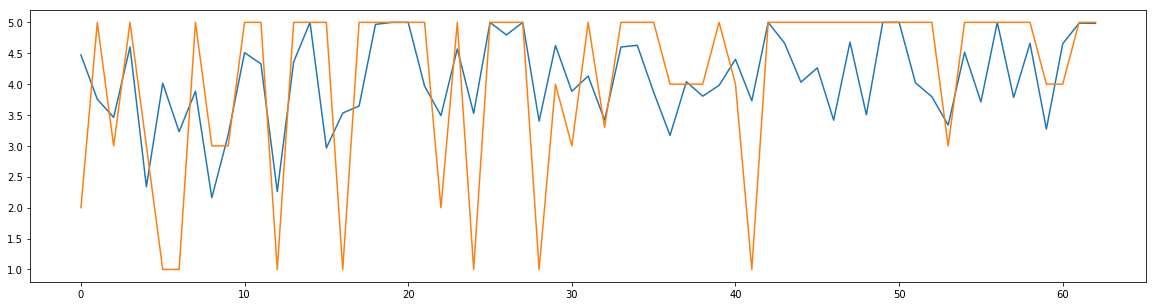

In [7]:
# Визуально анализируем полученный результат.
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

y_pred = model.predict(X_val)
y_pred = np.clip(y_pred, 1, 5)

plt.figure(figsize=(20,5))
plt.plot(y_pred[::50])
plt.plot(y_val[::50])
plt.show()